In [89]:
#We are trying to predict if a giben client will leave  the company in .
#The data we have is of  the clients whom left the company in the previous month.


import pandas  as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick 
from pylab import rcParams
Telecom_churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
# now that we imported the data lets grab a peek and understand all are columns
Telecom_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1 - understanding and cleaning the data



## Explanation for all columns

**gender**  -     male/female

**SeniorCitizen**   - is the customer a seniorcitizen(old)

**Partner**          -   Whether the customer has a partner or not 

**Dependents**        -  Whether the customer has dependents or not

**tenure**             - Number of months the customer has been with the company

**PhoneService**     -   Whether the customer has a phone service or not (Yes, No)

**MultipleLines**     -  Whether the customer has multiple lines or not (Yes, No, No Phone Service)

**InternetService**   -  Customer’s internet service type (DSL, Fiber Optic, None)

**OnlineSecurity**   -   Whether the customer has Online Security add-on (Yes, No, No Internet Service)

**OnlineBackup**     -   Whether the customer has Online Backup add-on (Yes, No, No Internet Service)

**DeviceProtection**  -  Whether the customer has Device Protection add-on (Yes, No, No Internet Service)

**TechSupport**      -   Whether the customer has Tech Support add-on (Yes, No, No Internet Service)

**StreamingTV**       -  Whether the customer has streaming TV or not (Yes, No, No Internet Service)

**StreamingMovies**   -  Whether the customer has streaming movies or not (Yes, No, No Internet Service)

**Contract**         -   Term of the customer’s contract (Monthly, 1-Year, 2-Year)

**PaperlessBilling**  -  PaperlessBilling — Whether the customer has paperless billing or not (Yes, No)

**PaymentMethod**     -  The customer’s payment method (E-Check, Mailed Check, Bank Transfer (Auto), Credit Card (Auto))

**MonthlyCharges**   -   The monthly amount charged to the customer

**TotalCharges**     -   The total amount charged to the customer

**Churn**           -    Had the Customer  left within the last month 

In [90]:
Telecom_churn.dtypes
#as we can see we have 3 numerical columns and 18 object columns. we will soon deal with this making sure to change all data to numerical

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [91]:
#lets look at what null values we have
Telecom_churn.TotalCharges = pd.to_numeric(Telecom_churn.TotalCharges, errors='coerce')
Telecom_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [92]:
#since its only 11 missing values we will remove them
Telecom_churn = Telecom_churn.dropna()
Telecom_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [93]:
#We can see there is no need for customerID so lets drop that column.
df1 = Telecom_churn.iloc[:,1:]
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 2 - vizualization

In [94]:
#My goal in this is project is to predict whether a given client will churn or not , lets focus on that , by understanding and searching for coralation with churn
df1['Churn'].value_counts(sort = False)


No     5163
Yes    1869
Name: Churn, dtype: int64

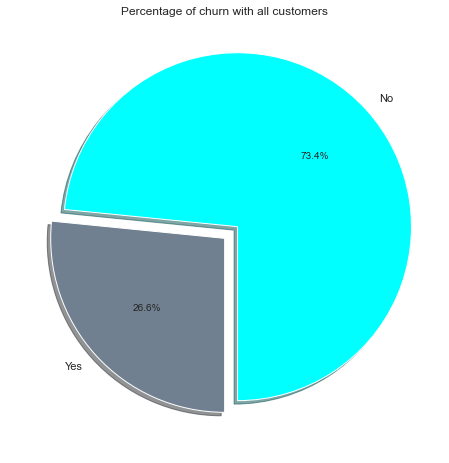

In [95]:
#lets see are main column in a graph using a pie from matplotlyb

labels =df1['Churn'].value_counts(sort = True).index
sizes = df1['Churn'].value_counts(sort = True)

colors = ["aqua" , "slategrey"]

explode = (0.1,0)  # explode 1st slice
rcParams['figure.figsize'] = 8,8

plt.pie(sizes, explode=explode, labels=labels,colors = colors ,
        autopct='%1.1f%%', shadow=True, startangle=270,) #autopct adds percents

plt.title('Percentage of churn with all customers')
plt.show()

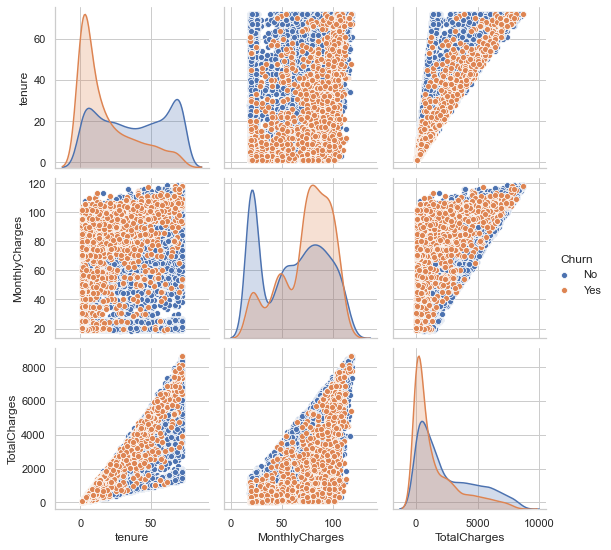

In [96]:
#I want to investigate deeper the 3 columns , with numercial data ,that i understand that have a connection between them and churn.
sns.pairplot(df1,vars = ['tenure','MonthlyCharges','TotalCharges' ], hue="Churn") # hue  = name of variable in data , vars = list of variable names

#as i suspected we can see that People having lower tenure and higher monthly charges are tend to churn more.

#### Observations


* **A.** As we can see in the top middle graphs. We anticipated correctly that People having lower tenure and higher monthly charges are tend to churn more.

* **B.** Observing the  middle  right graphs , noticing two things. The direct correlation between monthly and total charges , this will already indicate that there might be a redundancy . Also noticing that the churns occur closer to the diagonal , meaning theoretically like before , higher charges leads to more churns.

* **C.** Looking at the top right corner – This makes sense since the total charges are over all the years probably , meaning that the longer you are a client the more you paid along the years. Its just a little weird that there aren’t any outliers ( perhaps a client that paid 10000000 for one year, or a client that paid 1$ for 50 years) , but when you look at the monthly charges vs tenure its interesting to see the spread.


In [97]:
#changing churn  to numerical value inorder to use seaborns catplot to find churn probabilty with the type of contract the customer has
#while we are at it ,  we will change aditional values which are the similar(3 optiones)
columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'MultipleLines',
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling',
                      'Churn']
for item in columns_to_convert:
    df1[item] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in df1[item]]

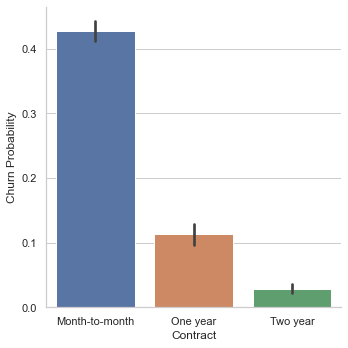

In [98]:
#lets if the type of contract the customer has affects his churn probability
sns.set(style="whitegrid")
g1=sns.catplot(x="Contract", y="Churn", data=df1,kind="bar")
g1.set_ylabels("Churn Probability")
#as we can see if the customer is on a month to month contract he is more likley to churn

In [99]:
df1.info()
#we have 3 values left that are not numerical so lets change them to dummy values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 


In [100]:
df_dummies =  pd.get_dummies(data=df1)
df_dummies.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,-1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,-1,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [101]:
#now that all  values are numerical lets check the coralation between all catagories to churn 
df_dummies.corr()['Churn'].sort_values()

#we knew already that tenure,Type of contract , and payments are very much related to the probabilty of a customer leaving 
#however we see new related values - Type of internt service and PaymentMethod_Electronic check.

tenure                                    -0.354049
Contract_Two year                         -0.301552
InternetService_No                        -0.227578
TotalCharges                              -0.199484
Contract_One year                         -0.178225
Dependents                                -0.163128
Partner                                   -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
gender_Male                               -0.008545
gender_Female                              0.008545
PhoneService                               0.011691
OnlineSecurity                             0.023014
TechSupport                                0.026744
MultipleLines                              0.036148
OnlineBackup                               0.073934
DeviceProtection                           0.084402
SeniorCitize

## Part 3 Predictive Model

 <span style="color:red"> **Step 1** </span> - Spliting the data into train test (added minmax scaler as well)
 
<span style="color:red"> **Step 2** </span> - Applying Machine Learning Algorithms(logistic regression and knn)

<span style="color:red"> **Step 3** </span> - Evaluting each algorithem and fine tunig in order to achieve the best results

<span style="color:red"> **Step 4** </span>- Determining which algorithem is optimal for our data set


#### Spliting the data into train test

In [102]:
#Using the dummies data set
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

In [103]:
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

It is important to scale the variables in logistic regression using the min max scaler so that all of them are within a range of 0 to 1. This helped me improve my accuracy from 79.5% to 80.5%.

In [104]:
#creating train and test set spliting 70% 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### 1. Logistic Regression 

In [105]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
result = model.fit(X_train, y_train)

In [106]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print ("Logstic Regression accuracy is - " , metrics.accuracy_score(y_test, prediction_test))
#We are not leaning to much to this score as we will run a classification report soon.

Logstic Regression accuracy is -  0.8056872037914692


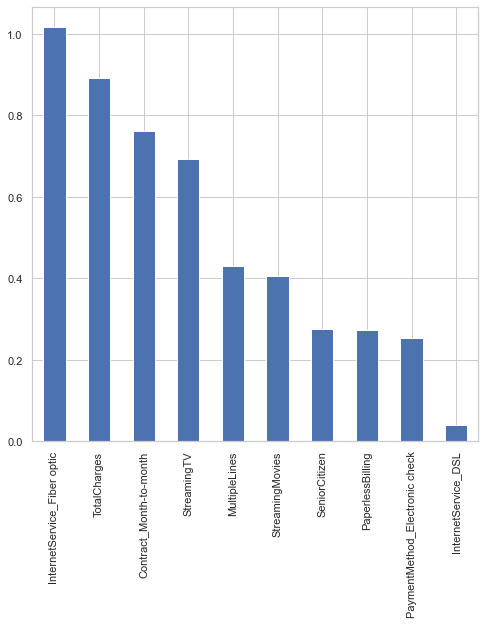

In [107]:
#I am curious in seeing the weight of all varialbes
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
(weights.sort_values(ascending = False)[:10].plot(kind='bar'))

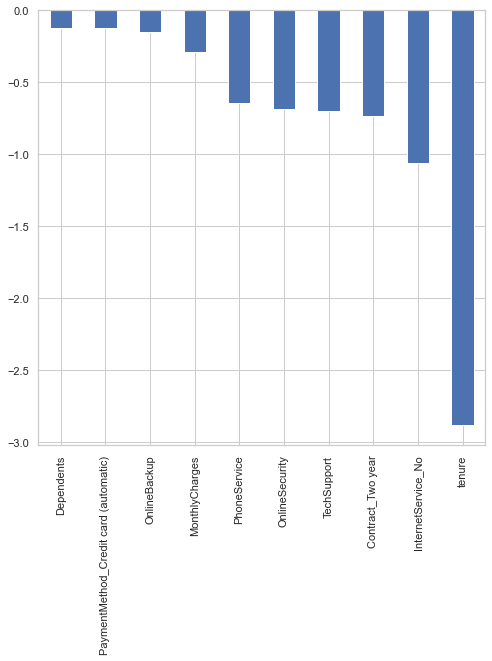

In [108]:
weights.sort_values(ascending = False)[-10:].plot(kind='bar')

Observations

-We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable.

-As we saw in our vizualization graphs, having a month to month contract and total charges increases chances of churn. In addition we can see that having interent fiber optic can lead to higher churn rates, I am not sure why since fiber optic usually means faster internet. 

-As we saw in our vizualization graphs, having a 2 year contract and tenure decreases chances of churn. 
We also see that having no internt also decreases chances of churn.


#### 2. KNN Classification

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5) #set K neighbor as 5 , we will optimize this later.
knn.fit(X_train,y_train)
predicted_y = knn.predict(X_test)
print("KNN accuracy according to K=5 is :",knn.score(X_test,y_test))

KNN accuracy according to K=5 is : 0.7625592417061612


Not a great score. We assumed K = 5 for first iteration, but actually we don't know what is the optimal K value that gives maximum accuracy. So we can write a for loop that iterates for example 50 times and gives the accuracy at each iteartion. This way we can find the optimal K value.

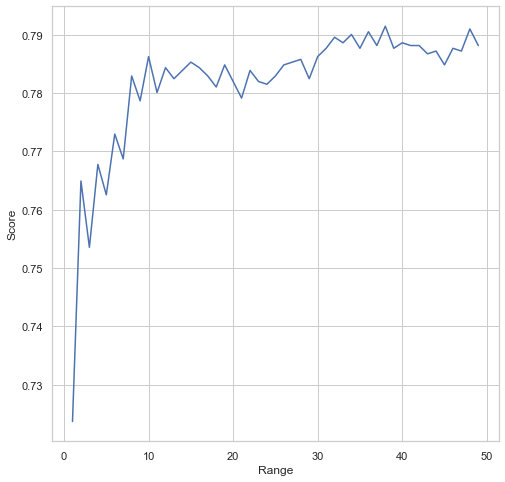

In [110]:
score_array = []
for each in range(1,50):
    knn_loop = KNeighborsClassifier(n_neighbors = each)
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))
    
plt.plot(range(1,50),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

As we can see above, if we use K = 38, we reach an optimal Score of 0.791 ,  I am aware to the fact  that the higher the k , the less general the model is and higher overfit ( e.g we can use k=10) . Although since we have 7000 observations I cocluded its optimal for my project to use k=38.

In [111]:
knn_model = KNeighborsClassifier(n_neighbors = 38) #set K neighbor as 38
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy according to K=38 is :",accuracy_knn)

KNN accuracy according to K=38 is : 0.7914691943127962


#### Evaluating the algorithms (Confusion Matrix and scores)

### Logistic Regression scores and evaluation

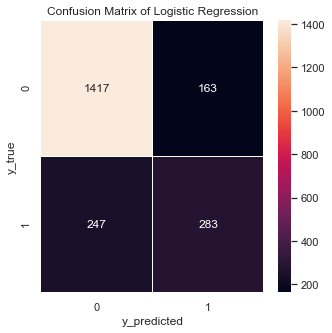

In [112]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

#for Logistic Regression
cm_lr = confusion_matrix(y_test,model.predict(X_test))

# %% confusion matrix visualization
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

TN = 1417

FP = 163

FN = 247

TP = 283

This means; there are total 1417+163 = 1580 actual non-churn values and the algorithm predict 1417 of them as non-churn and 163 of them churn. Also there are total 247 + 283 = 530 actual churn values and the algorithm predict 247 of them as non-churn and 283 of them as churnTN = 1417

FP = 163

FN = 247

TP = 283

This means; there are total 1417+163 = 1580 actual non-churn values and the algorithm predict 1417 of them as non-churn and 163 of them churn. Also there are total 247 + 283 = 530 actual churn values and the algorithm predict 247 of them as non-churn and 283 of them as churn

In [113]:
#report for logistc regression
report = classification_report(y_test, model.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.63      0.53      0.58       530

    accuracy                           0.81      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



We notice that are data set is imbalanced.

The precision is the number of correctly identified positive results divided by the number of all positive results.

$Precision = \dfrac{TP}{TP+FP}$

The recall is the number of correctly identified positive results divided by the number of all samples that should have been identified as positive.

$Recall = \dfrac{TP}{TP+FN}$

Since are dataset is imbalnced we will use the metric that combines both precision and recall. The F1 metric.
We will use F1 score to identify the best algorithm score.

$F1 = 2\cdot\dfrac{Precision \cdot Recall}{Precision + Recall}$

### Knn scores and evaluation

Remembering what we concluded after the logistic regression classification report , are focus is on the F1 score.

In [114]:
#Knn classification report
report = classification_report(y_test, knn_model.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1580
           1       0.61      0.49      0.54       530

    accuracy                           0.79      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.78      0.79      0.78      2110



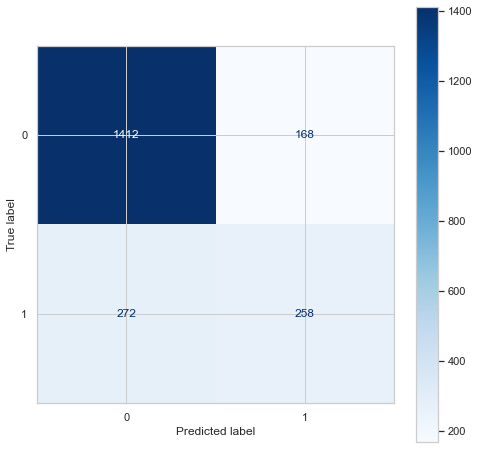

In [115]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model , X_test , y_test , cmap = 'Blues')

TN = 1412

FP = 168

FN = 272

TP = 258

This means; there are total 1412+168 = 1580 actual non-churn values and the algorithm predict 1412 of them as non-churn and 168 of them churn. Also there are total 272 + 258 = 530 actual churn values and the algorithm predict 272 of them as non-churn and 258 of them as churn.


Seems like Logostic Regression scored a tad better.

#### Cross validation
Since i know my model is overfitting i will  split the data into 10 and run the model fit 10 times , each iteration take 9 of the sets as the train , and the last as the test.
Then calculate the average.
Thus  generalizing the model and reducing overfitting.

In [116]:
#Checking cross validation scores for knn
from sklearn.model_selection import  cross_val_score,GridSearchCV
clf_score = cross_val_score(knn_model, X_train, y_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79107505 0.78904665 0.78861789 0.78252033 0.7601626  0.77845528
 0.79268293 0.78455285 0.80081301 0.78455285]


0.785247942743119

In [117]:
#Checking cross validation scores for Logistic regression
from sklearn.model_selection import  cross_val_score,GridSearchCV
clf_score = cross_val_score(model, X_train, y_train, cv=10)
print(clf_score)
clf_score.mean()

[0.79513185 0.80527383 0.77642276 0.81097561 0.79471545 0.79065041
 0.80081301 0.81300813 0.80487805 0.80284553]


0.7994714622602614

# the function that prints all scores
def print_scores(headline, y_true, y_pred):
    print(headline)
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)
print_scores("Logistic Regression: " ,y_test, model.predict(X_test))
print_scores("KNN: ",y_test, knn_model.predict(X_test))

### CONCLUSION
* Since data set is imbalanced, we prefered to use F1 score rather than accuracy.
* We noticed that data set is overfitting, therefore we generalized the model using cross validation. 
* Logistic Regression gives the highest F1 Score as well as the highest cross validation mean score, so it is the best model.
* Fitting the data properly optimizes the models score (For **KNN**- evaluating optimal number of neighbour to use. For **LR** - MinMax scaler)
* Working properly in step 2 (vizualization) helped us estimate properly which columns are most importent for training the models. 
**E.G** even before training and testing the model we knew high tenure leads to lower probabilty of churn.
